In [87]:
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from tools.eval_par_metrics import eval_par_accuracy
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd

category_names = ['gender', 'hair', 'shirt', 'plaid', 'stripe', 'sleeve',
                            'logo', 'shorts', 'skirt', 'hat', 'glasses', 'backpack', 'bag']
import seaborn as sns

In [88]:
pt = np.load("../par_OSNet_par_bces_SGD_lr_0.01_warmup_10_0.33_cosine_2_10_flip_crop_imagenet1.7485_pt.npy")
gt = np.load("../par_OSNet_par_bces_SGD_lr_0.01_warmup_10_0.33_cosine_2_10_flip_crop_imagenet1.7485_gt.npy")

In [89]:
TPR, FPR, total_precision, attr_TPR, attr_FPR, attr_total_precision = eval_par_accuracy(pt, gt)

PAR Accuracy: 100%|██████████| 100/100 [00:03<00:00, 27.23it/s]


Populating the interactive namespace from numpy and matplotlib


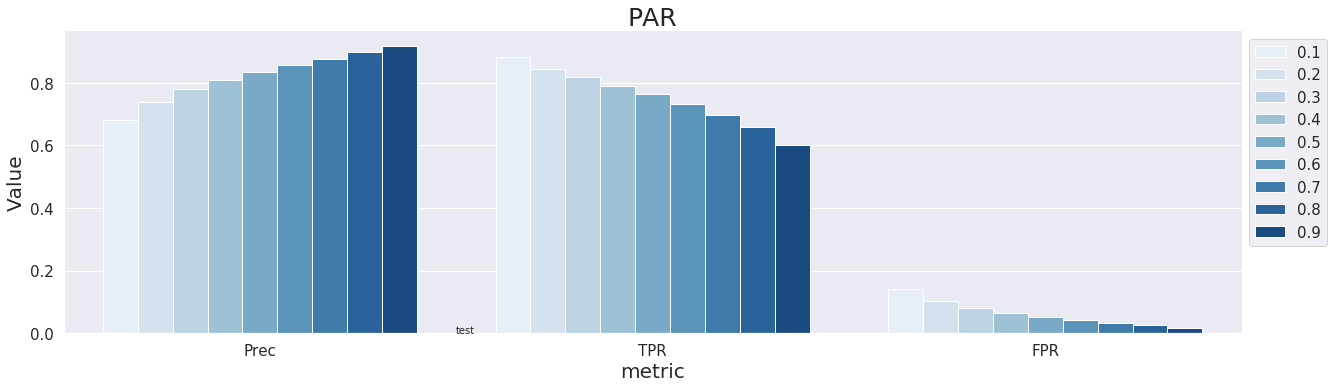

In [134]:
result = pd.DataFrame(columns=['threshold', 'metric', 'Value'])
metrics = {'Prec':total_precision, 'TPR':TPR, 'FPR':FPR}
for i in range(10,100,10):
    for metric in ['Prec', 'TPR', 'FPR']:
        data = {}
        data['threshold'] = float("{:.2f}".format(i * 0.01))
        data['metric'] = metric
        data['Value'] = metrics[metric][i]
        result = result.append(data, ignore_index=True)

%pylab inline
g = sns.catplot(x='metric', y='Value', hue='threshold', data=result, kind='bar', legend=False, palette="Blues")

g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
g.set_ylabels(fontsize=20)
g.set_xlabels(fontsize=20)
g.ax.text(x=.5,y=0.0,s="test")
plt.title("PAR", fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 15})
plt.show(g)

In [126]:
dir(g.ax)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title',
 '_make_twin_axes',
 '_

In [141]:
g.ax.get_xticklines()[0]

Populating the interactive namespace from numpy and matplotlib


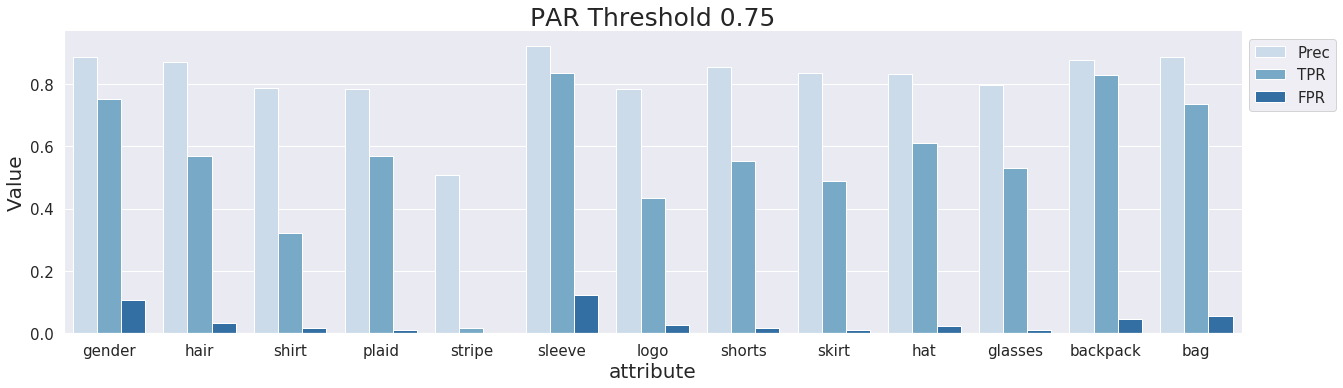

In [73]:
metrics = {'Prec':attr_total_precision, 'TPR':attr_TPR, 'FPR':attr_FPR}

result = pd.DataFrame(columns=['metric', 'attribute', 'Value'])
thresh = 75
for metric in metrics.keys():
    for j, attr in enumerate(category_names):
        data = {}
        data['metric'] = metric
        data['attribute'] = attr
        data['Value'] = metrics[metric][thresh][j]
        result = result.append(data, ignore_index=True)

%pylab inline
g = sns.catplot(x='attribute', y='Value', hue='metric', data=result, kind='bar', legend=False, palette="Blues")
g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
g.set_ylabels(fontsize=20)
g.set_xlabels(fontsize=20)
plt.title("PAR Threshold {:.2f}".format(thresh*0.01), fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 15})
plt.show(g)

Populating the interactive namespace from numpy and matplotlib


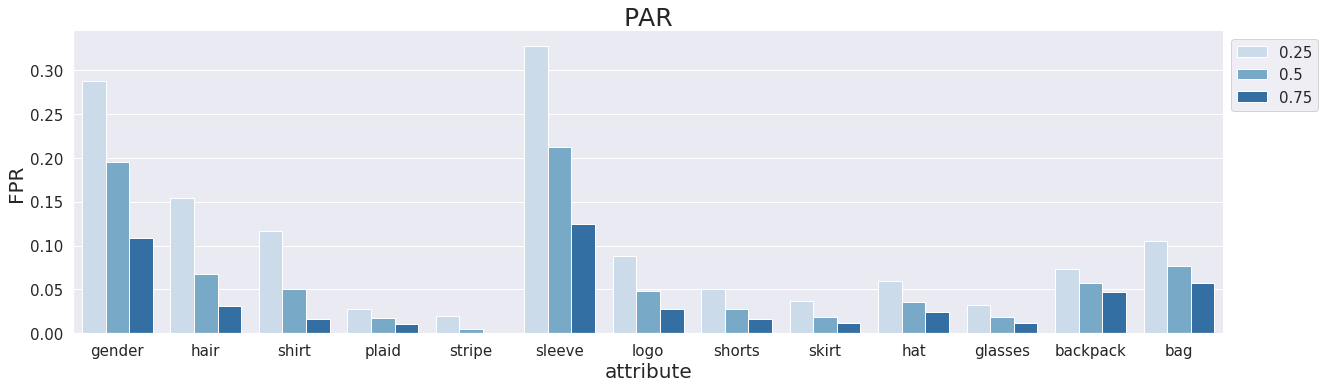

In [69]:
metric = "FPR"
metrics = {'Prec':attr_total_precision, 'TPR':attr_TPR, 'FPR':attr_FPR}

result = pd.DataFrame(columns=['threshold', 'attribute', metric])

for i in [25,50,75]:
    for j, attr in enumerate(category_names):
        data = {}
        data['threshold'] = i * 0.01
        data['attribute'] = attr
        data[metric] = metrics[metric][i][j]
        result = result.append(data, ignore_index=True)

%pylab inline
g = sns.catplot(x='attribute', y=metric, hue='threshold', data=result, kind='bar', legend=False, palette="Blues")
g.fig.set_figheight(5)
g.fig.set_figwidth(20)
g.set_xticklabels(fontsize=15)
g.set_yticklabels(fontsize=15)
g.set_ylabels(fontsize=20)
g.set_xlabels(fontsize=20)
plt.title("PAR", fontsize=25)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.5,  prop={'size': 15})
plt.show(g)

In [86]:
for i in g.facet_data():
    print(i)
    break

((0, 0, 0),    metric attribute     Value
0    Prec    gender  0.885781
1    Prec      hair  0.870337
2    Prec     shirt  0.785933
3    Prec     plaid  0.781979
4    Prec    stripe  0.506667
5    Prec    sleeve  0.921787
6    Prec      logo  0.784286
7    Prec    shorts  0.853693
8    Prec     skirt  0.833421
9    Prec       hat  0.830157
10   Prec   glasses  0.795580
11   Prec  backpack  0.876268
12   Prec       bag  0.886760
13    TPR    gender  0.751995
14    TPR      hair  0.567692
15    TPR     shirt  0.320849
16    TPR     plaid  0.569754
17    TPR    stripe  0.016987
18    TPR    sleeve  0.834649
19    TPR      logo  0.433670
20    TPR    shorts  0.552948
21    TPR     skirt  0.489171
22    TPR       hat  0.609922
23    TPR   glasses  0.529412
24    TPR  backpack  0.827701
25    TPR       bag  0.734627
26    FPR    gender  0.108040
27    FPR      hair  0.031507
28    FPR     shirt  0.016700
29    FPR     plaid  0.010415
30    FPR    stripe  0.000833
31    FPR    sleeve  0.12394

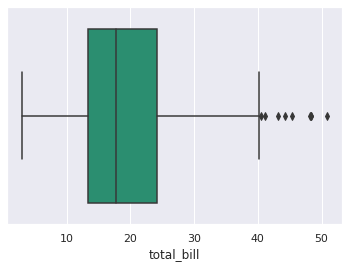

In [78]:
ax.figure

In [54]:
dir(g.set_palette)

AttributeError: 'FacetGrid' object has no attribute 'set_palette'

In [20]:
sns.plotting_context()

{'font.size': 12.0,
 'axes.labelsize': 12.0,
 'axes.titlesize': 12.0,
 'xtick.labelsize': 11.0,
 'ytick.labelsize': 11.0,
 'legend.fontsize': 11.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0}